https://code.kx.com/q/interfaces/pyq/install/ -- Done

https://www.youtube.com/watch?v=v2UoP0l6mOw&feature=youtu.be --Working here on this

In [1]:
import matplotlib
from pyq import q 

In [2]:
import os
os.getcwd()

'/Users/jvsingh/work/play_q'

In [3]:
from matplotlib import pyplot as plt
img = plt.imread("jai_bali.jpg")

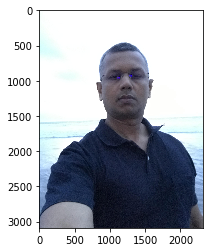

In [4]:
plt.imshow(img)

In [5]:
%q read1`:jai_bali.jpg

0xffd8ffe000104a46494600010100000100010000ffe1002a45786966000049492a000800000..

but since it is compressed, it is not very useful

In [6]:
def read_image(path):
    path = str(path).lstrip(':')
    x = plt.imread(path)
    return(K(x))

ir = q('{x enlist y}', read_image)
q.set('.im.read', ir)

`.im.read

In [7]:
%q 

1 + 5

6

In [9]:
x = %q  1 + 2

In [10]:
x

3

In [11]:
%q \p

1025i

In [12]:
%q \a

`symbol$()

Start a session on your machine listening to port 5000. And connect to it form here. This notebook becomes client of another q server listening at port 5000.


In [14]:
%%q

h:hopen `::5000

In [15]:
%q h "a:6*7"

::

In [16]:
res = %q h ({x+y}; 6;12 )

In [17]:
res

18

Start a q session on some other place and connect to this notebook(underlying q kernel) as server. This notebook becomes a Server listening at 4444

In [19]:
%%q

\p 4444

(base) jvsingh: ~  -> q


KDB+ 4.0 2020.03.17 Copyright (C) 1993-2020 Kx Systems

m64/ 6(16)core 32768MB jvsingh jais-mac-mini-2.local 127.0.0.1 EXPIRE 2021.04.07
jaivrat.singh@gmail.com KOD #4170131

q)h:hopen `::4444

q)h "jupytervar:10*4"

q)

In [21]:
%%q

jupytervar

40

Coming back to youtube video:
    